# Shannon entropy for continuous variables

In this notebook we explore the concept of **Shannon entropy** for continuous variables (see Chapter 7 of the book).

From a probabilistic modeling perspective, entropy quantifies uncertainty: the less we know about the possible value of a random variable the larger its entropy is. Entropy is a very important concept in physics but it is also central in information theory. In the former case, in the statistical mechanics' definition, the entropy is porportional to the logarithm of the number of microscopic configurations that a system can access. In information theory, the concept of entropy was introduced by Shannon and measures the average amount of information, or surprise, associated with the possible outcomes of a random process. In mathematical terms, Shannon entropy $H(X)$ for a discrete random variable $X$ with a probability distribution $P(X)$ is calculated as $-\mathbb{E}(\log P(X))$. Analogously, for continuous variables with probability density function $f(x) > 0$, the Shannon entropy is calculated as $-\mathbb{E}(\log f(X))$.

The key points to understand about Shannon entropy are:

- Higher entropy values indicate greater uncertainty or randomness in the random variable.
- When all outcomes have equal probabilities (maximum uncertainty), the entropy is at its maximum.
- When one outcome has a probability of 1 (no uncertainty), the entropy is 0.
- It is commonly used in various fields, including information theory, data compression, and machine learning, to measure and analyze uncertainty and information in data and systems.

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, lognorm
import scipy.special as sc

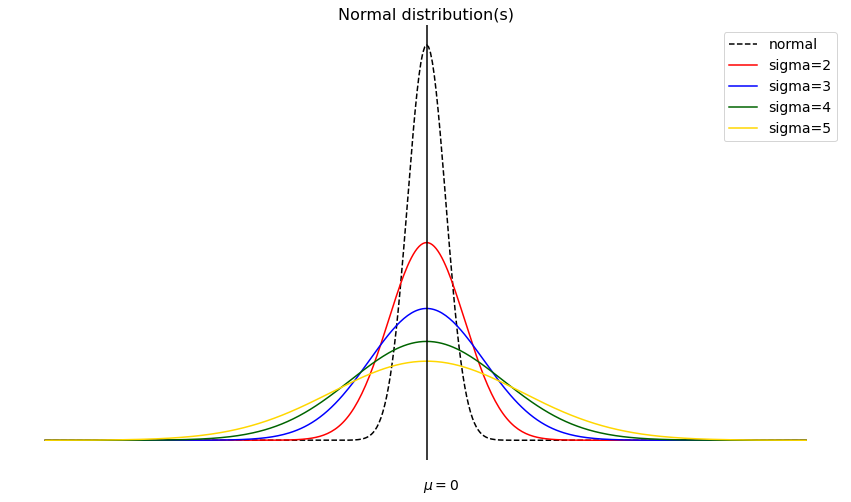

In [76]:
# Let's now generate and visualise a range of normal distributions.
x = np.arange(-20, 20, 0.1)
sigma = [2, 3, 4, 5]
color = ["red", "blue", "darkgreen", "gold"]
handle = ["sigma=2", "sigma=3", "sigma=4", "sigma=5"]

plt.figure(figsize=(15, 8))
plt.title("Normal distribution(s)", fontsize=16)

plt.plot(x, norm.pdf(x, 0, 1), color="black", linestyle="--", label="normal")

# Let's plot the normal distributions for different sigma values.
for s, c, h in zip(sigma, color, handle):
    y = norm.pdf(x, 0, s)
    plt.plot(x, y, color=c, label=h)


plt.axvline(
    x=0,
    color="black",
)

plt.text(-0.2, -0.05, ("$\mu = 0$"), fontsize=14)
plt.legend(fontsize=14)

plt.axis("off")
plt.show()

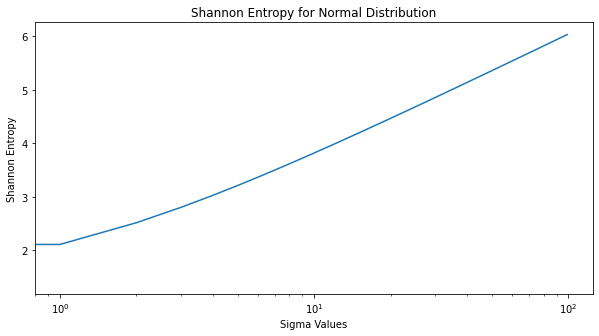

In [77]:
# Let's now study how the Shannon entropy value for normal distribution evolves for broader distributions.
normal_distribution_entropy_list = []
for s in range(1, 101):
    normal_distribution_entropy = np.log(s) + 0.5 + (0.5 * np.log(2 * math.pi))
    normal_distribution_entropy_list.append(normal_distribution_entropy)

plt.figure(figsize=(10, 5))
plt.plot(normal_distribution_entropy_list)
plt.xticks([0, 49, 99], labels=[1, 50, 100])
plt.xscale('log')
plt.title("Shannon Entropy for Normal Distribution")
plt.xlabel("Sigma Values")
plt.ylabel("Shannon Entropy")
plt.show()

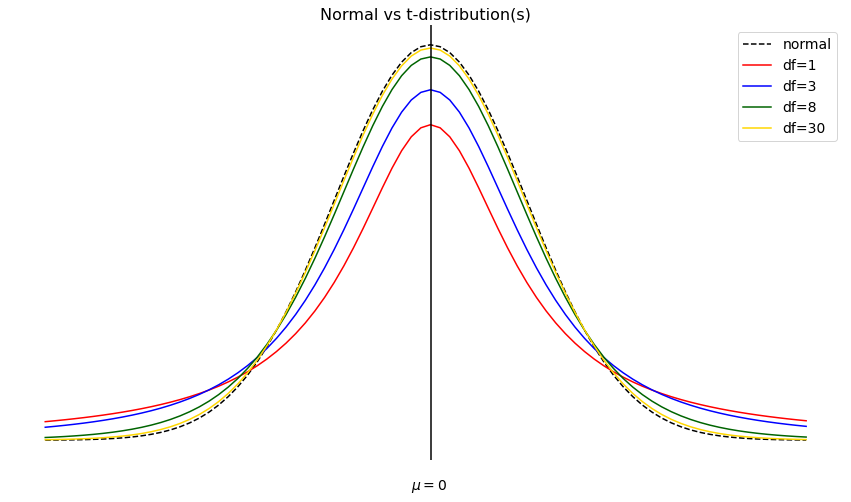

In [82]:
# Let's now generate and visualise the Student-t distribution comparing it to the normal distribution.
x = np.arange(-4, 4, 0.1)
df = [1, 2, 8, 30]
color = ["red", "blue", "darkgreen", "gold"]
handle = ["df=1", "df=3", "df=8", "df=30"]


plt.figure(figsize=(15, 8))
plt.title("Normal vs t-distribution(s)", fontsize=16)

plt.plot(x, norm.pdf(x, 0, 1), color="black", linestyle="--", label="normal")

# Let's plot the Student-t distribution for different degree of freedom values.
for d, c, h in zip(df, color, handle):
    y = t.pdf(x, df=d, loc=0, scale=1)
    plt.plot(x, y, color=c, label=h)


plt.axvline(
    x=0,
    color="black",
)

plt.text(-0.2, -0.05, ("$\mu = 0$"), fontsize=14)
plt.legend(fontsize=14)

plt.axis("off")
plt.show()

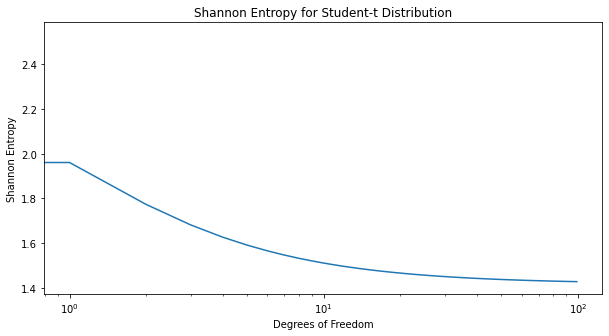

In [79]:
# Let's now study how the Shannon entropy value for the Student-t distribution evolves varying the degrees of freedom value.
student_t_distribution_entropy_list = []
for df in range(1, 101):
    student_t_distribution_entropy = np.log(1) + ((df + 1)/2) * (sc.digamma(((df + 1)/2)) - sc.digamma(df/2)) + np.log(np.sqrt(df)*sc.beta((df/2), 0.5))
    student_t_distribution_entropy_list.append(student_t_distribution_entropy)

plt.figure(figsize=(10, 5))
plt.plot(student_t_distribution_entropy_list)
plt.xticks([0, 49, 99], labels=[1, 50, 100])
plt.xscale('log')
plt.title("Shannon Entropy for Student-t Distribution")
plt.xlabel("Degrees of Freedom")
plt.ylabel("Shannon Entropy")
plt.show()

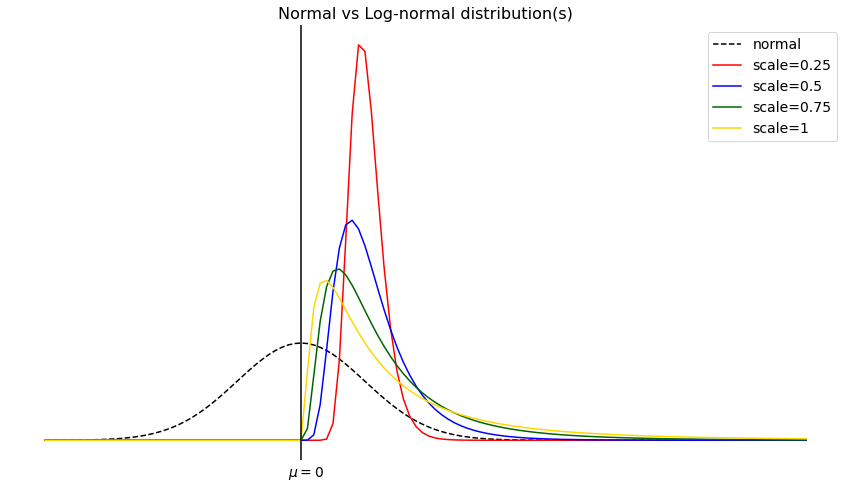

In [87]:
# Let's now study how the Shannon entropy value for the log-normal distribution evolves varying the degrees of freedom value.
x = np.arange(-4, 8, 0.1)
sigma_log_normal = [0.25, 0.5, 0.75, 1]
color = ["red", "blue", "darkgreen", "gold"]
handle = ["scale=0.25", "scale=0.5", "scale=0.75", "scale=1"]


plt.figure(figsize=(15, 8))
plt.title("Normal vs Log-normal distribution(s)", fontsize=16)

plt.plot(x, norm.pdf(x, 0, 1), color="black", linestyle="--", label="normal")

# Let's plot the Student-t distribution for different degree of freedom values.
for s, c, h in zip(sigma_log_normal, color, handle):
    y = lognorm.pdf(x, s=s, loc=0, scale=1)
    plt.plot(x, y, color=c, label=h)

plt.legend(fontsize=14)

plt.axvline(
    x=0,
    color="black",
)

plt.text(-0.2, -0.15, ("$\mu = 0$"), fontsize=14)
plt.legend(fontsize=14)

plt.axis("off")
plt.show()

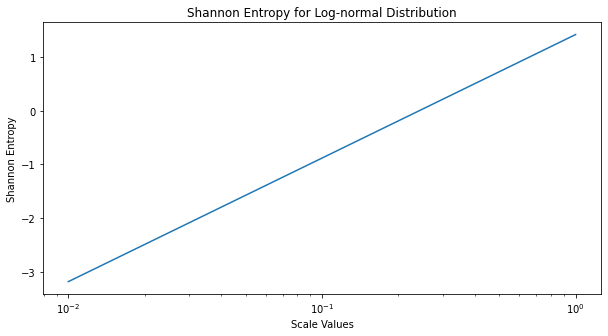

In [81]:
# Let's now study how the Shannon entropy value for the Student-t distribution evolves varying the degrees of freedom value.
log_normal_distribution_entropy_list = []
xs = np.linspace(0.01, 1, 100)
for s in xs:
    log_normal_distribution_entropy = np.log(s) + np.log((np.e**(1/2)) * np.sqrt(2 * np.pi))
    log_normal_distribution_entropy_list.append(log_normal_distribution_entropy)

plt.figure(figsize=(10, 5))
plt.plot(xs, log_normal_distribution_entropy_list)
plt.xscale('log')
plt.title("Shannon Entropy for Log-normal Distribution")
plt.xlabel("Scale Values")
plt.ylabel("Shannon Entropy")
plt.show()